BONUS ZADATAK IZ KVANTNE FIZIKE


Zadan je niz jama u obliku slova $V$ i dubine $V_0$ koje imaju minimume u točkama $..., -5a, -3a, -a, a, 3a, 5a, ...$ a spajaju se u točkama $..., -4a, -2a, 0, 2a, 4a, ...$ Odredite granice prve tri energijske vrpce koristeći analitička rješenja linearnog potencijala (Airy funkcije) te usporedite rješenja s numeričkim. Nacrtajte valne funkcije za najniže i najviše stanje u prve tri vrpce.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
from scipy.special import airy
from scipy.integrate import simps,quad
from scipy.integrate import odeint

In [2]:
AA=8.6375   #m/hbar
BB=13.12     #m/hbar**2
hbar=AA/BB
m=AA*hbar

In [3]:
V_0=1.8
a=0.5
l=(a*hbar**2/(2*m*V_0))**(1./3.)

In [4]:
def point1(lam):
    Ai,Aip,Bi,Bip=airy(-lam) #vraca vrijednosti funkcija Ai, Bi i njihove derivacije
    return Bi/Ai,Bip/Aip

def point2(lam):
    Ai,Aip,Bi,Bip=airy(-a/l-lam) #vraca vrijednosti funkcija Ai, Bi i njihove derivacije
    return Bi/Ai,Bip/Aip

def fun1(lam):
    Ai,Aip,Bi,Bip=airy(-lam) #vraca vrijednosti funkcija Ai, Bi i njihove derivacije
    return Ai,Aip,Bi,Bip

def fun2(lam):
    Ai,Aip,Bi,Bip=airy(-a/l-lam) #vraca vrijednosti funkcija Ai, Bi i njihove derivacije
    return Ai,Aip,Bi,Bip

def funk1(E):
    lam=2*m*E*l**2/hbar**2
    t,T=point1(lam)
    g,G=point2(lam)
    return ((G+g)*(T+t)-2*G*g-2*T*t)/((G-g)*(T-t))

In [5]:
Emax = 3
dE=Emax/2000
energije=np.arange(-V_0,Emax,dE)
fval=[]
for E in energije:
    fval.append(funk1(E))
fval=np.array(fval)

Text(0.5, 0, 'Energija')

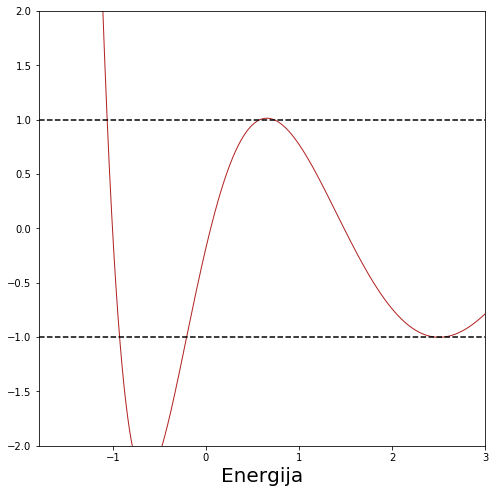

In [6]:
fig1=plt.figure(1,figsize=(8,8))
plt.plot(energije,fval,color='firebrick',lw=1,ls='-')
plt.axhline(y=1.0,ls='--',color='black')
plt.axhline(y=-1.0,ls='--',color='black')
plt.ylim(-2,2)
plt.xlim(-V_0,Emax)
plt.xlabel('Energija', fontsize=20)

In [7]:
Emin1=brentq(lambda E:funk1(E)-1.0,-1.5,-0.8)
print('Emin1 = ',Emin1)
Emax1=brentq(lambda E:funk1(E)+1.0,-1.5,-0.8)
print('Emax1 = ',Emax1)
Emin2=brentq(lambda E:funk1(E)+1.0,-0.7,0.0)
print('Emin2 = ',Emin2)
Emax2=brentq(lambda E:funk1(E)-1.0,0.0,0.6)
print('Emax2 = ',Emax2)
Emin3=brentq(lambda E:funk1(E)-1.0,0.6,1.0)
print('Emin3 = ',Emin3)
Emax3=brentq(lambda E:funk1(E)+1.0,2.0,2.5)
print('Emax3 = ',Emax3)

Emin1 =  -1.062546195255538
Emax1 =  -0.9288812312320582
Emin2 =  -0.20788796170916954
Emax2 =  0.5812566038120879
Emin3 =  0.7301396282150443
Emax3 =  2.4626458401405245


In [8]:
k=np.pi/(8*a)
E=brentq(lambda E:funk1(E)-np.cos(2*k*a),Emin1,Emax1)
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= -1.0472245914704508


In [9]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

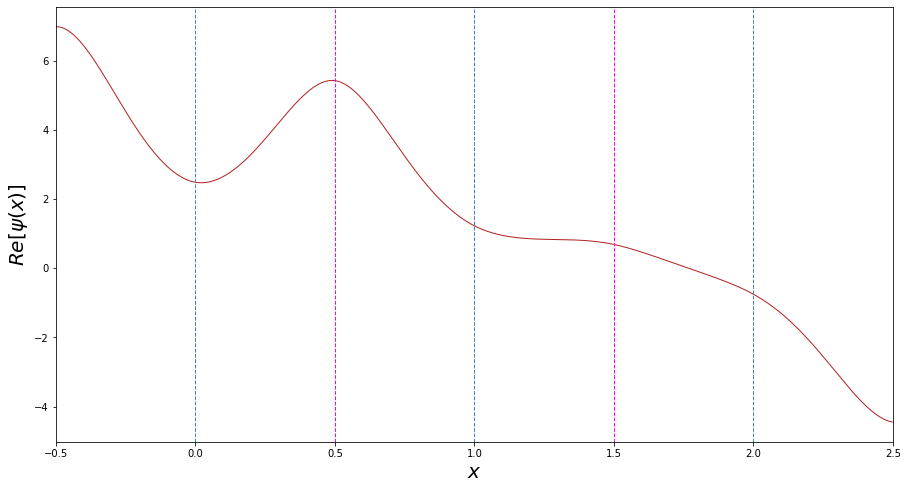

In [10]:
fig2=plt.figure(2,figsize=(15,8))
plt.plot(x1,np.real(wf1),color='firebrick',lw=1,ls='-')
plt.plot(x2,np.real(wf2),color='firebrick',lw=1,ls='-')
plt.plot(x3,np.real(wf3),color='firebrick',lw=1,ls='-')
plt.plot(x4,np.real(wf4),color='firebrick',lw=1,ls='-')
plt.plot(x5,np.real(wf5),color='firebrick',lw=1,ls='-')
plt.plot(x6,np.real(wf6),color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$Re[\psi(x)]$',fontsize=20)
plt.xlim(-a,5*a)

(-0.5, 2.5)

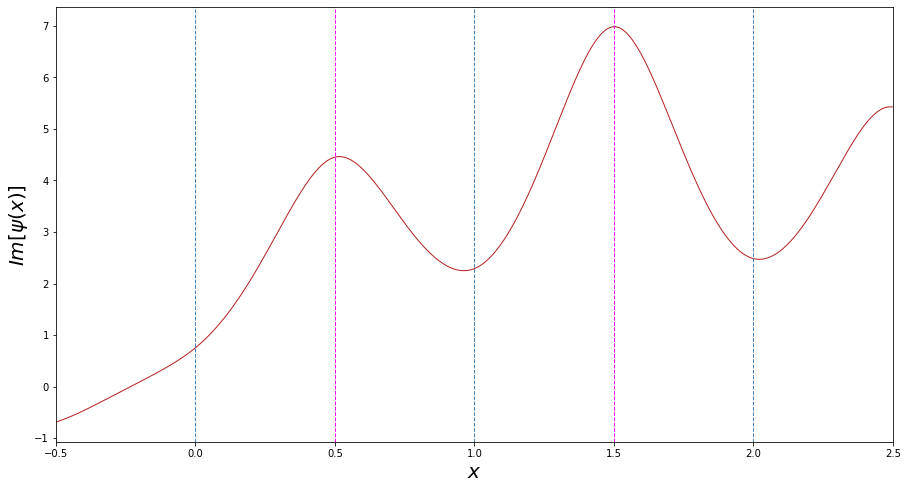

In [11]:
fig3=plt.figure(3,figsize=(15,8))
plt.plot(x1,np.imag(wf1),color='firebrick',lw=1,ls='-')
plt.plot(x2,np.imag(wf2),color='firebrick',lw=1,ls='-')
plt.plot(x3,np.imag(wf3),color='firebrick',lw=1,ls='-')
plt.plot(x4,np.imag(wf4),color='firebrick',lw=1,ls='-')
plt.plot(x5,np.imag(wf5),color='firebrick',lw=1,ls='-')
plt.plot(x6,np.imag(wf6),color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$Im[\psi(x)]$',fontsize=20)
plt.xlim(-a,5*a)

(-0.5, 2.5)

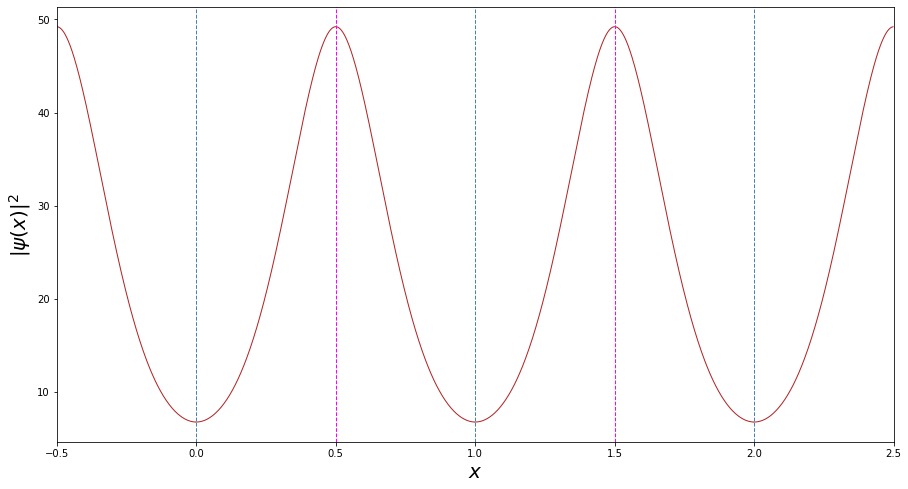

In [12]:
fig4=plt.figure(4,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)

In [13]:
dk=np.pi/100
kval=np.arange(-V_0,np.pi/(2*a)+dk,dk)
Eband1=[]
for k in kval:
    E=brentq(lambda E:funk1(E)-np.cos(2*k*a),Emin1,Emax1)
    Eband1.append(E)
Eband2=[]
for k in kval:
    E=brentq(lambda E:funk1(E)-np.cos(2*k*a),Emin2,Emax2)
    Eband2.append(E)
Eband3=[]
for k in kval:
    E=brentq(lambda E:funk1(E)-np.cos(2*k*a),Emin3,Emax3)
    Eband3.append(E)    

Text(0, 0.5, '$E$')

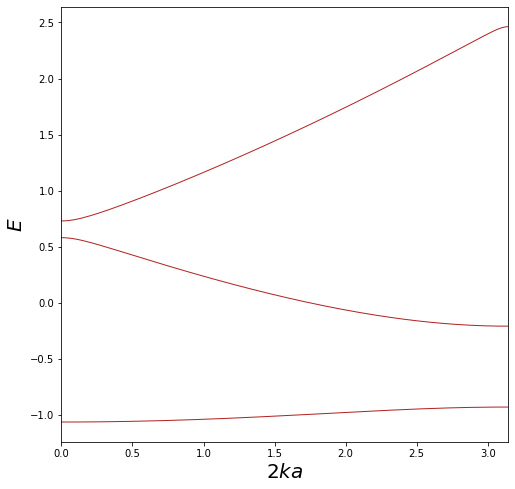

In [14]:
fig5=plt.figure(5,figsize=(8,8))
plt.plot(2*kval*a,Eband1,color='firebrick',lw=1,ls='-')
plt.plot(2*kval*a,Eband2,color='firebrick',lw=1,ls='-')
plt.plot(2*kval*a,Eband3,color='firebrick',lw=1,ls='-')
plt.xlim(0.0,np.pi)
plt.xlabel(r'$2ka$',fontsize=20)
plt.ylabel(r'$E$',fontsize=20)

In [15]:
E=Emin1
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= -1.062546195255538


In [16]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

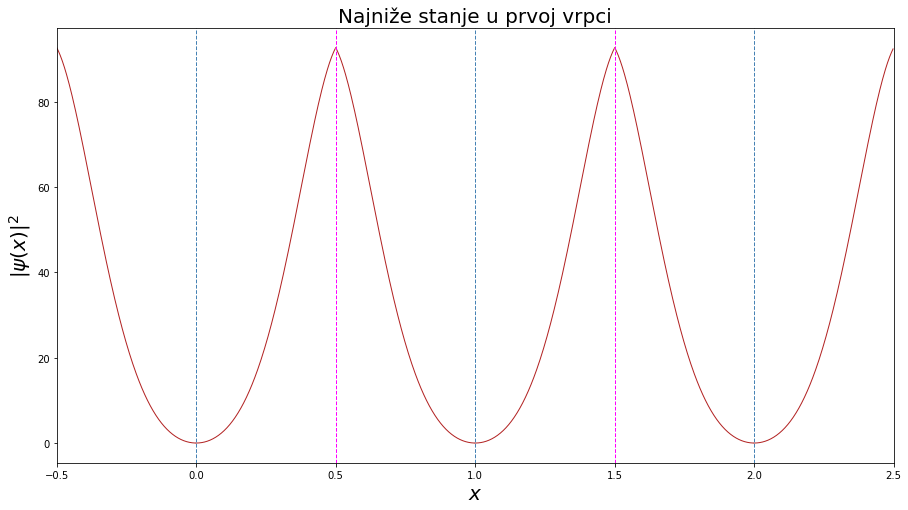

In [17]:
fig5=plt.figure(5,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.title('Najniže stanje u prvoj vrpci',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)

In [18]:
E=Emax1
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= -0.9288812312320582


In [19]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

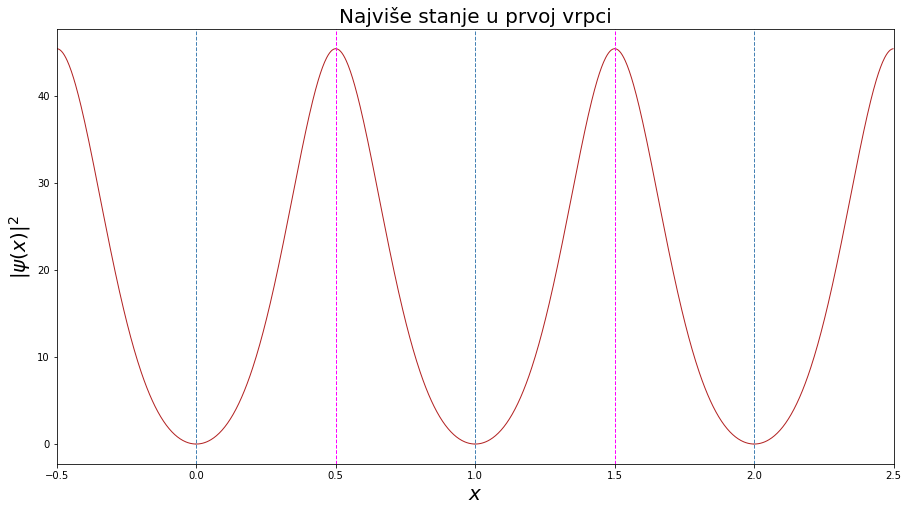

In [20]:
fig5=plt.figure(5,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.title('Najviše stanje u prvoj vrpci',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)

In [21]:
E=Emin2
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= -0.20788796170916954


In [22]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

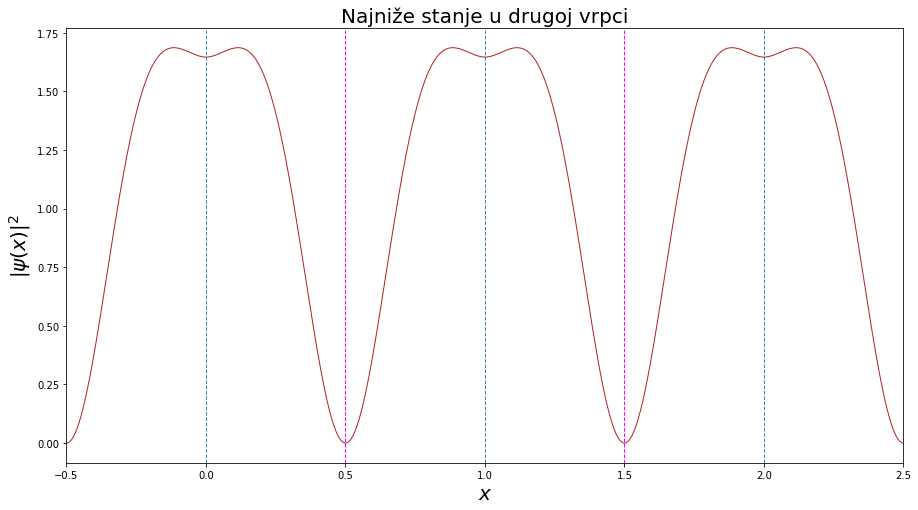

In [23]:
fig5=plt.figure(5,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.title('Najniže stanje u drugoj vrpci',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)

In [24]:
E=Emax2
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= 0.5812566038120879


In [25]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

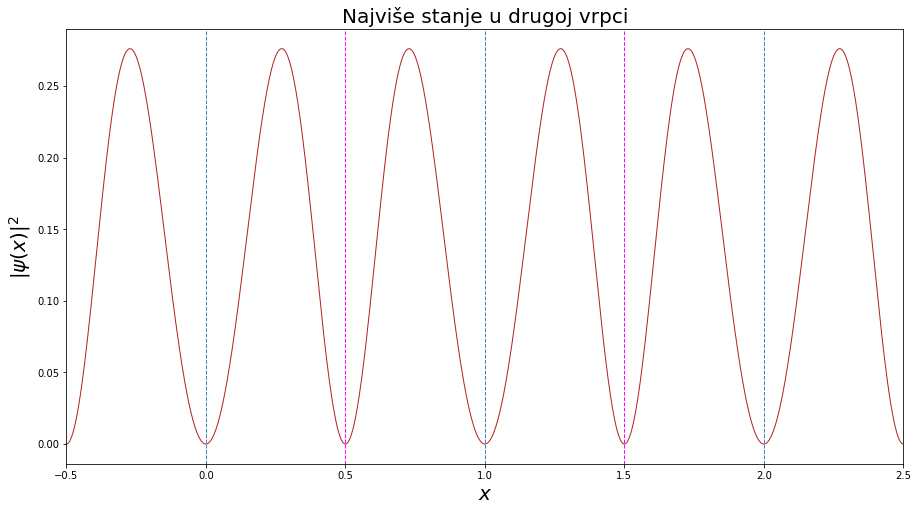

In [26]:
fig5=plt.figure(5,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.title('Najviše stanje u drugoj vrpci',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)

In [27]:
E=Emin3
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= 0.7301396282150443


In [28]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

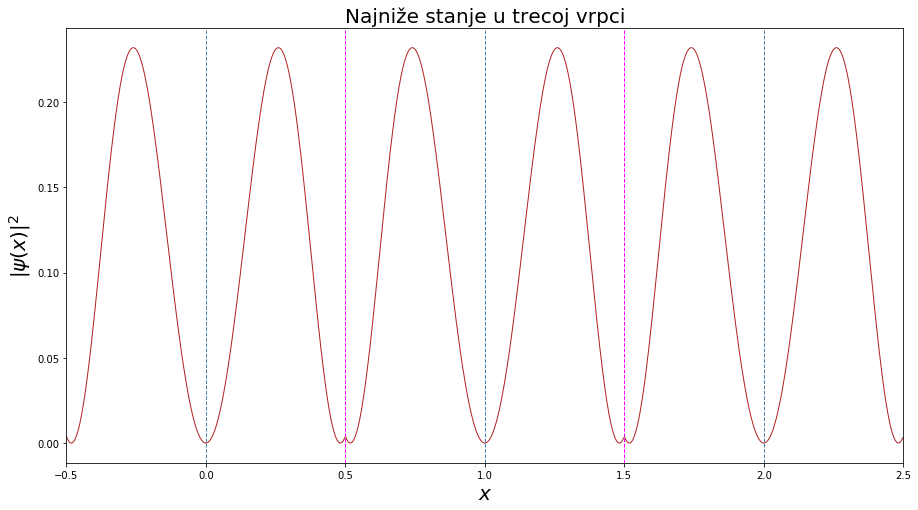

In [29]:
fig5=plt.figure(5,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.title('Najniže stanje u trecoj vrpci',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)

In [30]:
E=Emax3
print('E=',E)
lam=2*m*E*l**2/hbar**2
D_coeff=1.0
Ail,Aipl,Bil,Bipl=fun1(lam)
Aiy,Aipy,Biy,Bipy=fun2(lam)
f=(Ail*Bipl+Aipl*Bil)/(Ail*Bipl-Aipl*Bil)
g=Ail*Aipl/(Ail*Bipl-Aipl*Bil)
h=Bil*Bipl/(Ail*Bipl-Aipl*Bil)
C_coeff=-D_coeff*(Biy+np.exp(1j*2*k*a)*f*Biy-np.exp(1j*2*k*a)*2*h*Aiy)/(Aiy-np.exp(1j*2*k*a)*f*Aiy+np.exp(1j*2*k*a)*2*g*Biy)
B_coeff=-f*D_coeff-2*g*C_coeff
A_coeff=f*C_coeff+2*h*D_coeff

E= 2.4626458401405245


In [31]:
dx=a/200

x1=np.arange(-a+0.0001,0.0-0.0001,dx)
wf1=A_coeff*airy(x1/l-lam)[0]+B_coeff*airy(x1/l-lam)[2]

x2=np.arange(0.0+0.0001,a-0.0001,dx)
wf2=C_coeff*airy(-x2/l-lam)[0]+D_coeff*airy(-x2/l-lam)[2]

x3=np.arange(a+0.0001,2*a-0.0001,dx)
wf3=np.exp(2*1j*k*a)*wf1

x4=np.arange(2*a+0.0001,3*a-0.0001,dx)
wf4=np.exp(2*1j*k*a)*wf2

x5=np.arange(3*a+0.0001,4*a-0.0001,dx)
wf5=np.exp(4*1j*k*a)*wf1

x6=np.arange(4*a+0.0001,5*a-0.0001,dx)
wf6=np.exp(4*1j*k*a)*wf2

(-0.5, 2.5)

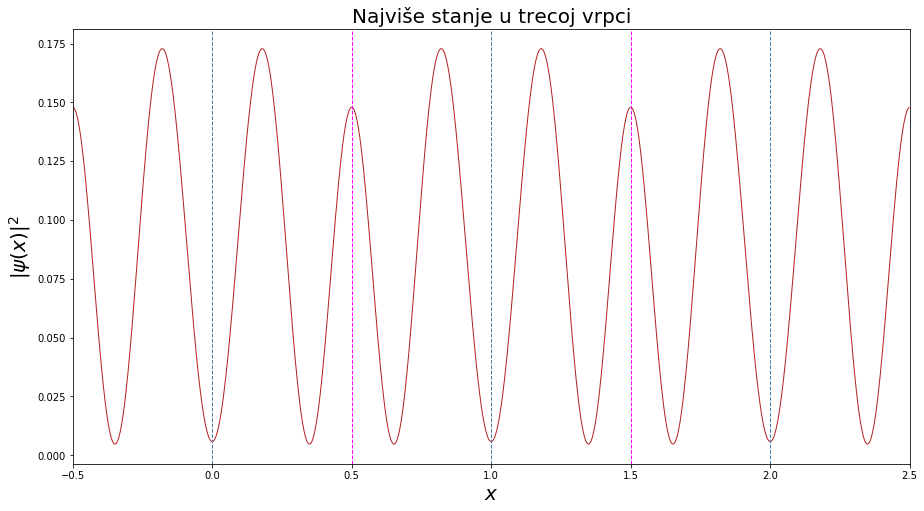

In [32]:
fig5=plt.figure(5,figsize=(15,8))
plt.plot(x1,np.abs(wf1)**2,color='firebrick',lw=1,ls='-')
plt.plot(x2,np.abs(wf2)**2,color='firebrick',lw=1,ls='-')
plt.plot(x3,np.abs(wf3)**2,color='firebrick',lw=1,ls='-')
plt.plot(x4,np.abs(wf4)**2,color='firebrick',lw=1,ls='-')
plt.plot(x5,np.abs(wf5)**2,color='firebrick',lw=1,ls='-')
plt.plot(x6,np.abs(wf6)**2,color='firebrick',lw=1,ls='-')
plt.axvline(x=0,ls='--',lw=1,color='steelblue')
plt.axvline(x=a,ls='--',lw=1,color='magenta')
plt.axvline(x=2*a,ls='--',lw=1,color='steelblue')
plt.axvline(x=3*a,ls='--',lw=1,color='magenta')
plt.axvline(x=4*a,ls='--',lw=1,color='steelblue')
plt.title('Najviše stanje u trecoj vrpci',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$|\psi(x)|^2$',fontsize=20)
plt.xlim(-a,5*a)